# TensorFlow Tutorial

Welcome to this week's programming assignment. Until now, you've always used numpy to build neural networks. Now we will step you through a deep learning framework that will allow you to build neural networks more easily. Machine learning frameworks like TensorFlow, PaddlePaddle, Torch, Caffe, Keras, and many others can speed up your machine learning development significantly. All of these frameworks also have a lot of documentation, which you should feel free to read. In this assignment, you will learn to do the following in TensorFlow: 

- Initialize variables
- Start your own session
- Train algorithms 
- Implement a Neural Network

Programing frameworks can not only shorten your coding time, but sometimes also perform optimizations that speed up your code. 

## 1 - Exploring the Tensorflow Library

To start, you will import the library:


In [18]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict
import time

%matplotlib inline
np.random.seed(1)

Now that you have imported the library, we will walk you through its different applications. You will start with an example, where we compute for you the loss of one training example. 
$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [3]:
y_hat = tf.constant(36, name='y_hat')            # Define y_hat constant. Set to 36.
y = tf.constant(39, name='y')                    # Define y. Set to 39

loss = tf.Variable((y - y_hat)**2, name='loss')  # Create a variable for the loss

init = tf.global_variables_initializer()         # When init is run later (session.run(init)),
                                                 # the loss variable will be initialized and ready to be computed
with tf.Session() as session:                    # Create a session and print the output
    session.run(init)                            # Initializes the variables
    print(session.run(loss))                     # Prints the loss

9


Writing and running programs in TensorFlow has the following steps:

1. Create Tensors (variables) that are not yet executed/evaluated. 
2. Write operations between those Tensors.
3. Initialize your Tensors. 
4. Create a Session. 
5. Run the Session. This will run the operations you'd written above. 

Therefore, when we created a variable for the loss, we simply defined the loss as a function of other quantities, but did not evaluate its value. To evaluate it, we had to run `init=tf.global_variables_initializer()`. That initialized the loss variable, and in the last line we were finally able to evaluate the value of `loss` and print its value.

Now let us look at an easy example. Run the cell below:

In [4]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


As expected, you will not see 20! You got a tensor saying that the result is a tensor that does not have the shape attribute, and is of type "int32". All you did was put in the 'computation graph', but you have not run this computation yet. In order to actually multiply the two numbers, you will have to create a session and run it.

In [5]:
sess = tf.Session()
print(sess.run(c))

20


Great! To summarize, **remember to initialize your variables, create a session and run the operations inside the session**. 

Next, you'll also have to know about placeholders. A placeholder is an object whose value you can specify only later. 
To specify values for a placeholder, you can pass in values by using a "feed dictionary" (`feed_dict` variable). Below, we created a placeholder for x. This allows us to pass in a number later when we run the session. 

In [6]:
# Change the value of x in the feed_dict

x = tf.placeholder(tf.int64, name = 'x')
print(sess.run(2 * x, feed_dict = {x: 3}))
sess.close()

6


When you first defined `x` you did not have to specify a value for it. A placeholder is simply a variable that you will assign data to only later, when running the session. We say that you **feed data** to these placeholders when running the session. 

Here's what's happening: When you specify the operations needed for a computation, you are telling TensorFlow how to construct a computation graph. The computation graph can have some placeholders whose values you will specify only later. Finally, when you run the session, you are telling TensorFlow to execute the computation graph.

### 1.1 - Linear function

Lets start this programming exercise by computing the following equation: $Y = WX + b$, where $W$ and $X$ are random matrices and b is a random vector. 

**Exercise**: Compute $WX + b$ where $W, X$, and $b$ are drawn from a random normal distribution. W is of shape (4, 3), X is (3,1) and b is (4,1). As an example, here is how you would define a constant X that has shape (3,1):
```python
X = tf.constant(np.random.randn(3,1), name = "X")

```
You might find the following functions helpful: 
- tf.matmul(..., ...) to do a matrix multiplication
- tf.add(..., ...) to do an addition
- np.random.randn(...) to initialize randomly


In [7]:
# GRADED FUNCTION: linear_function

def linear_function():
    """
    Implements a linear function: 
            Initializes W to be a random tensor of shape (4,3)
            Initializes X to be a random tensor of shape (3,1)
            Initializes b to be a random tensor of shape (4,1)
    Returns: 
    result -- runs the session for Y = WX + b 
    """
    
    np.random.seed(1)
    
    ### START CODE HERE ### (4 lines of code)
    X = tf.constant(np.random.randn(3,1), name='X')
    W = tf.constant(np.random.randn(4,3), name='W')
    b = tf.constant(np.random.randn(4,1), name='b')
    Y = tf.matmul(W,X) + b
    ### END CODE HERE ### 
    
    # Create the session using tf.Session() and run it with sess.run(...) on the variable you want to calculate
    
    ### START CODE HERE ###
    sess = tf.Session()
    result = sess.run(Y)
    ### END CODE HERE ### 
    
    # close the session 
    sess.close()

    return result

In [8]:
print( "result = " + str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


*** Expected Output ***: 

<table> 
<tr> 
<td>
**result**
</td>
<td>
[[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]
</td>
</tr> 

</table> 

### 1.2 - Computing the sigmoid 
Great! You just implemented a linear function. Tensorflow offers a variety of commonly used neural network functions like `tf.sigmoid` and `tf.softmax`. For this exercise lets compute the sigmoid function of an input. 

You will do this exercise using a placeholder variable `x`. When running the session, you should use the feed dictionary to pass in the input `z`. In this exercise, you will have to (i) create a placeholder `x`, (ii) define the operations needed to compute the sigmoid using `tf.sigmoid`, and then (iii) run the session. 

** Exercise **: Implement the sigmoid function below. You should use the following: 

- `tf.placeholder(tf.float32, name = "...")`
- `tf.sigmoid(...)`
- `sess.run(..., feed_dict = {x: z})`


Note that there are two typical ways to create and use sessions in tensorflow: 

**Method 1:**
```python
sess = tf.Session()
# Run the variables initialization (if needed), run the operations
result = sess.run(..., feed_dict = {...})
sess.close() # Close the session
```
**Method 2:**
```python
with tf.Session() as sess: 
    # run the variables initialization (if needed), run the operations
    result = sess.run(..., feed_dict = {...})
    # This takes care of closing the session for you :)
```


In [9]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Computes the sigmoid of z
    
    Arguments:
    z -- input value, scalar or vector
    
    Returns: 
    results -- the sigmoid of z
    """
    
    ### START CODE HERE ### ( approx. 4 lines of code)
    # Create a placeholder for x. Name it 'x'.
    x = tf.placeholder(tf.float32, name='x')

    # compute sigmoid(x)
    sigmoid = tf.sigmoid(x)

    # Create a session, and run it. Please use the method 2 explained above. 
    # You should use a feed_dict to pass z's value to x. 
    with tf.Session() as sess:
        # Run session and call the output "result"
        result = sess.run(sigmoid, feed_dict = {x: z})
    
    ### END CODE HERE ###
    
    return result

In [10]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


*** Expected Output ***: 

<table> 
<tr> 
<td>
**sigmoid(0)**
</td>
<td>
0.5
</td>
</tr>
<tr> 
<td>
**sigmoid(12)**
</td>
<td>
0.999994
</td>
</tr> 

</table> 

<font color='blue'>
**To summarize, you how know how to**:
1. Create placeholders
2. Specify the computation graph corresponding to operations you want to compute
3. Create the session
4. Run the session, using a feed dictionary if necessary to specify placeholder variables' values. 

### 1.3 -  Computing the Cost

You can also use a built-in function to compute the cost of your neural network. So instead of needing to write code to compute this as a function of $a^{[2](i)}$ and $y^{(i)}$ for i=1...m: 
$$ J = - \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log a^{ [2] (i)} + (1-y^{(i)})\log (1-a^{ [2] (i)} )\large )\small\tag{2}$$

you can do it in one line of code in tensorflow!

**Exercise**: Implement the cross entropy loss. The function you will use is: 


- `tf.nn.sigmoid_cross_entropy_with_logits(logits = ...,  labels = ...)`

Your code should input `z`, compute the sigmoid (to get `a`) and then compute the cross entropy cost $J$. All this can be done using one call to `tf.nn.sigmoid_cross_entropy_with_logits`, which computes

$$- \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log \sigma(z^{[2](i)}) + (1-y^{(i)})\log (1-\sigma(z^{[2](i)})\large )\small\tag{2}$$



In [11]:
# GRADED FUNCTION: cost

def cost(logits, labels):
    """
    Computes the cost using the sigmoid cross entropy
    
    Arguments:
    logits -- vector containing z, output of the last linear unit (before the final sigmoid activation)
    labels -- vector of labels y (1 or 0) 
    
    Note: What we've been calling "z" and "y" in this class are respectively called "logits" and "labels" 
    in the TensorFlow documentation. So logits will feed into z, and labels into y. 
    
    Returns:
    cost -- runs the session of the cost (formula (2))
    """
    
    ### START CODE HERE ### 
    
    # Create the placeholders for "logits" (z) and "labels" (y) (approx. 2 lines)
    z = tf.placeholder(tf.float32, name='z')
    y = tf.placeholder(tf.float32, name='y')
    
    # Use the loss function (approx. 1 line)
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = z, labels = y)
    
    # Create a session (approx. 1 line). See method 1 above.
    sess = tf.Session()
    
    # Run the session (approx. 1 line).
    cost = sess.run(cost, feed_dict={z: logits, y: labels})
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    
    ### END CODE HERE ###
    
    return cost

In [12]:
logits = sigmoid(np.array([0.2,0.4,0.7,0.9]))
cost = cost(logits, np.array([0,0,1,1]))
print ("cost = " + str(cost))

cost = [1.0053872  1.0366409  0.4138543  0.39956614]


** Expected Output** : 

<table> 
    <tr> 
        <td>
            **cost**
        </td>
        <td>
        [ 1.00538719  1.03664088  0.41385433  0.39956614]
        </td>
    </tr>

</table>

### 1.4 - Using One Hot encodings

Many times in deep learning you will have a y vector with numbers ranging from 0 to C-1, where C is the number of classes. If C is for example 4, then you might have the following y vector which you will need to convert as follows:


<img src="images/onehot.png" style="width:600px;height:150px;">

This is called a "one hot" encoding, because in the converted representation exactly one element of each column is "hot" (meaning set to 1). To do this conversion in numpy, you might have to write a few lines of code. In tensorflow, you can use one line of code: 

- tf.one_hot(labels, depth, axis) 

**Exercise:** Implement the function below to take one vector of labels and the total number of classes $C$, and return the one hot encoding. Use `tf.one_hot()` to do this. 

In [13]:
# GRADED FUNCTION: one_hot_matrix

def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    
    ### START CODE HERE ###
    
    # Create a tf.constant equal to C (depth), name it 'C'. (approx. 1 line)
    C = tf.constant(C, name='C')
    
    # Use tf.one_hot, be careful with the axis (approx. 1 line)
    one_hot_matrix = tf.one_hot(labels, C, axis=0)
    
    # Create the session (approx. 1 line)
    sess = tf.Session()
    
    # Run the session (approx. 1 line)
    one_hot = sess.run(one_hot_matrix)
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    
    ### END CODE HERE ###
    
    return one_hot

In [14]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = " + str(one_hot))

one_hot = [[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


**Expected Output**: 

<table> 
    <tr> 
        <td>
            **one_hot**
        </td>
        <td>
        [[ 0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.]]
        </td>
    </tr>

</table>


### 1.5 - Initialize with zeros and ones

Now you will learn how to initialize a vector of zeros and ones. The function you will be calling is `tf.ones()`. To initialize with zeros you could use tf.zeros() instead. These functions take in a shape and return an array of dimension shape full of zeros and ones respectively. 

**Exercise:** Implement the function below to take in a shape and to return an array (of the shape's dimension of ones). 

 - tf.ones(shape)


In [15]:
# GRADED FUNCTION: ones

def ones(shape):
    """
    Creates an array of ones of dimension shape
    
    Arguments:
    shape -- shape of the array you want to create
        
    Returns: 
    ones -- array containing only ones
    """
    
    ### START CODE HERE ###
    
    # Create "ones" tensor using tf.ones(...). (approx. 1 line)
    ones = tf.ones(shape)
    
    # Create the session (approx. 1 line)
    sess = tf.Session()
    
    # Run the session to compute 'ones' (approx. 1 line)
    ones = sess.run(ones)
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    
    ### END CODE HERE ###
    return ones

In [16]:
print ("ones = " + str(ones([3])))

ones = [1. 1. 1.]


**Expected Output:**

<table> 
    <tr> 
        <td>
            **ones**
        </td>
        <td>
        [ 1.  1.  1.]
        </td>
    </tr>

</table>

# 2 - Building your first neural network in tensorflow

In this part of the assignment you will build a neural network using tensorflow. Remember that there are two parts to implement a tensorflow model:

- Create the computation graph
- Run the graph

Let's delve into the problem you'd like to solve!

### 2.0 - Problem statement: SIGNS Dataset

One afternoon, with some friends we decided to teach our computers to decipher sign language. We spent a few hours taking pictures in front of a white wall and came up with the following dataset. It's now your job to build an algorithm that would facilitate communications from a speech-impaired person to someone who doesn't understand sign language.

- **Training set**: 1080 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (180 pictures per number).
- **Test set**: 120 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (20 pictures per number).

Note that this is a subset of the SIGNS dataset. The complete dataset contains many more signs.

Here are examples for each number, and how an explanation of how we represent the labels. These are the original pictures, before we lowered the image resolutoion to 64 by 64 pixels.
<img src="images/hands.png" style="width:800px;height:350px;"><caption><center> <u><font color='purple'> **Figure 1**</u><font color='purple'>: SIGNS dataset <br> <font color='black'> </center>


Run the following code to load the dataset.

In [3]:
# Loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

Change the index below and run the cell to visualize some examples in the dataset.

y = 5


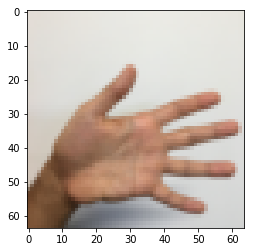

In [4]:
# Example of a picture
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

As usual you flatten the image dataset, then normalize it by dividing by 255. On top of that, you will convert each label to a one-hot vector as shown in Figure 1. Run the cell below to do so.

In [5]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


**Note** that 12288 comes from $64 \times 64 \times 3$. Each image is square, 64 by 64 pixels, and 3 is for the RGB colors. Please make sure all these shapes make sense to you before continuing.

**Your goal** is to build an algorithm capable of recognizing a sign with high accuracy. To do so, you are going to build a tensorflow model that is almost the same as one you have previously built in numpy for cat recognition (but now using a softmax output). It is a great occasion to compare your numpy implementation to the tensorflow one. 

**The model** is *LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX*. The SIGMOID output layer has been converted to a SOFTMAX. A SOFTMAX layer generalizes SIGMOID to when there are more than two classes. 

### 2.1 - Create placeholders

Your first task is to create placeholders for `X` and `Y`. This will allow you to later pass your training data in when you run your session. 

**Exercise:** Implement the function below to create the placeholders in tensorflow.

In [6]:
# GRADED FUNCTION: create_placeholders

def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    ### START CODE HERE ### (approx. 2 lines)
    X = tf.placeholder(tf.float32, (n_x, None))
    Y = tf.placeholder(tf.float32, (n_y, None))
    ### END CODE HERE ###
    
    return X, Y

In [7]:
X, Y = create_placeholders(12288, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(6, ?), dtype=float32)


**Expected Output**: 

<table> 
    <tr> 
        <td>
            **X**
        </td>
        <td>
        Tensor("Placeholder_1:0", shape=(12288, ?), dtype=float32) (not necessarily Placeholder_1)
        </td>
    </tr>
    <tr> 
        <td>
            **Y**
        </td>
        <td>
        Tensor("Placeholder_2:0", shape=(10, ?), dtype=float32) (not necessarily Placeholder_2)
        </td>
    </tr>

</table>

### 2.2 - Initializing the parameters

Your second task is to initialize the parameters in tensorflow.

**Exercise:** Implement the function below to initialize the parameters in tensorflow. You are going use Xavier Initialization for weights and Zero Initialization for biases. The shapes are given below. As an example, to help you, for W1 and b1 you could use: 

```python
W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
```
Please use `seed = 1` to make sure your results match ours.

In [8]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 6 lines of code)
    W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [6,1], initializer = tf.zeros_initializer())
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [9]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


**Expected Output**: 

<table> 
    <tr> 
        <td>
            **W1**
        </td>
        <td>
         < tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref >
        </td>
    </tr>
    <tr> 
        <td>
            **b1**
        </td>
        <td>
        < tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref >
        </td>
    </tr>
    <tr> 
        <td>
            **W2**
        </td>
        <td>
        < tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref >
        </td>
    </tr>
    <tr> 
        <td>
            **b2**
        </td>
        <td>
        < tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref >
        </td>
    </tr>

</table>

As expected, the parameters haven't been evaluated yet.

### 2.3 - Forward propagation in tensorflow 

You will now implement the forward propagation module in tensorflow. The function will take in a dictionary of parameters and it will complete the forward pass. The functions you will be using are: 

- `tf.add(...,...)` to do an addition
- `tf.matmul(...,...)` to do a matrix multiplication
- `tf.nn.relu(...)` to apply the ReLU activation

**Question:** Implement the forward pass of the neural network. We commented for you the numpy equivalents so that you can compare the tensorflow implementation to numpy. It is important to note that the forward propagation stops at `z3`. The reason is that in tensorflow the last linear layer output is given as input to the function computing the loss. Therefore, you don't need `a3`!



In [10]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    ### START CODE HERE ### (approx. 5 lines)              # Numpy Equivalents:
    Z1 = tf.matmul(W1, X) + b1                             # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.matmul(W2, A1) + b2                            # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.matmul(W3, A2) + b3                             # Z3 = np.dot(W3,Z2) + b3
    ### END CODE HERE ###
    
    return Z3

In [11]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("add_2:0", shape=(6, ?), dtype=float32)


**Expected Output**: 

<table> 
    <tr> 
        <td>
            **Z3**
        </td>
        <td>
        Tensor("Add_2:0", shape=(6, ?), dtype=float32)
        </td>
    </tr>

</table>

You may have noticed that the forward propagation doesn't output any cache. You will understand why below, when we get to brackpropagation.

### 2.4 Compute cost

As seen before, it is very easy to compute the cost using:
```python
tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ..., labels = ...))
```
**Question**: Implement the cost function below. 
- It is important to know that the "`logits`" and "`labels`" inputs of `tf.nn.softmax_cross_entropy_with_logits` are expected to be of shape (number of examples, num_classes). We have thus transposed Z3 and Y for you.
- Besides, `tf.reduce_mean` basically does the summation over the examples.

In [12]:
# GRADED FUNCTION: compute_cost 

def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    ### END CODE HERE ###
    
    return cost

In [13]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = Tensor("Mean:0", shape=(), dtype=float32)


**Expected Output**: 

<table> 
    <tr> 
        <td>
            **cost**
        </td>
        <td>
        Tensor("Mean:0", shape=(), dtype=float32)
        </td>
    </tr>

</table>

### 2.5 - Backward propagation & parameter updates

This is where you become grateful to programming frameworks. All the backpropagation and the parameters update is taken care of in 1 line of code. It is very easy to incorporate this line in the model.

After you compute the cost function. You will create an "`optimizer`" object. You have to call this object along with the cost when running the tf.session. When called, it will perform an optimization on the given cost with the chosen method and learning rate.

For instance, for gradient descent the optimizer would be:
```python
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
```

To make the optimization you would do:
```python
_ , c = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
```

This computes the backpropagation by passing through the tensorflow graph in the reverse order. From cost to inputs.

**Note** When coding, we often use `_` as a "throwaway" variable to store values that we won't need to use later. Here, `_` takes on the evaluated value of `optimizer`, which we don't need (and `c` takes the value of the `cost` variable). 

### 2.6 - Building the model

Now, you will bring it all together! 

**Exercise:** Implement the model. You will be calling the functions you had previously implemented.

In [14]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    ### START CODE HERE ### (1 line)
    X, Y = create_placeholders(n_x, n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z3 = forward_propagation(X, parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z3, Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                ### END CODE HERE ###
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Run the following cell to train your model! On our machine it takes about 5 minutes. Your "Cost after epoch 100" should be 1.016458. If it's not, don't waste time; interrupt the training by clicking on the square (⬛) in the upper bar of the notebook, and try to correct your code. If it is the correct cost, take a break and come back in 5 minutes!

Cost after epoch 0: 1.855702
Cost after epoch 100: 1.016458
Cost after epoch 200: 0.733102
Cost after epoch 300: 0.572939
Cost after epoch 400: 0.468774
Cost after epoch 500: 0.381015
Cost after epoch 600: 0.313829
Cost after epoch 700: 0.254169
Cost after epoch 800: 0.203800
Cost after epoch 900: 0.166474
Cost after epoch 1000: 0.141408
Cost after epoch 1100: 0.107606
Cost after epoch 1200: 0.086730
Cost after epoch 1300: 0.061016
Cost after epoch 1400: 0.050911


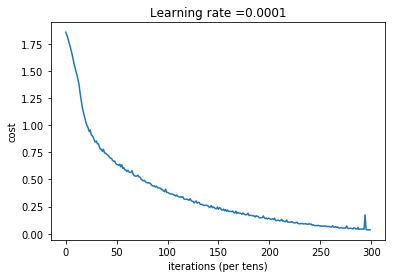

Parameters have been trained!
Train Accuracy: 0.9990741
Test Accuracy: 0.725


In [16]:
parameters = model(X_train, Y_train, X_test, Y_test, num_epochs = 1500)

**Expected Output**:

<table> 
    <tr> 
        <td>
            **Train Accuracy**
        </td>
        <td>
        0.999074
        </td>
    </tr>
    <tr> 
        <td>
            **Test Accuracy**
        </td>
        <td>
        0.716667
        </td>
    </tr>

</table>

Amazing, your algorithm can recognize a sign representing a figure between 0 and 5 with 71.7% accuracy.

**Insights**:
- Your model seems big enough to fit the training set well. However, given the difference between train and test accuracy, you could try to add L2 or dropout regularization to reduce overfitting. 
- Think about the session as a block of code to train the model. Each time you run the session on a minibatch, it trains the parameters. In total you have run the session a large number of times (1500 epochs) until you obtained well trained parameters.

### 2.7 - Test with your own image (optional / ungraded exercise)

Congratulations on finishing this assignment. You can now take a picture of your hand and see the output of your model. To do that:
    1. Click on "File" in the upper bar of this notebook, then click "Open" to go on your Coursera Hub.
    2. Add your image to this Jupyter Notebook's directory, in the "images" folder
    3. Write your image's name in the following code
    4. Run the code and check if the algorithm is right!

D:\Users\iamfish\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()
D:\Users\iamfish\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if sys.path[0] == '':


Your algorithm predicts: y = 3


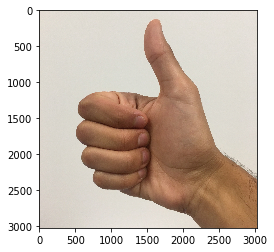

In [20]:
import scipy
from PIL import Image
from scipy import ndimage

## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "thumbs_up.jpg"
## END CODE HERE ##

# We preprocess your image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))

You indeed deserved a "thumbs-up" although as you can see the algorithm seems to classify it incorrectly. The reason is that the training set doesn't contain any "thumbs-up", so the model doesn't know how to deal with it! We call that a "mismatched data distribution" and it is one of the various of the next course on "Structuring Machine Learning Projects".

<font color='blue'>
**What you should remember**:
- Tensorflow is a programming framework used in deep learning
- The two main object classes in tensorflow are Tensors and Operators. 
- When you code in tensorflow you have to take the following steps:
    - Create a graph containing Tensors (Variables, Placeholders ...) and Operations (tf.matmul, tf.add, ...)
    - Create a session
    - Initialize the session
    - Run the session to execute the graph
- You can execute the graph multiple times as you've seen in model()
- The backpropagation and optimization is automatically done when running the session on the "optimizer" object.

In [15]:
def model2(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True, lamdb = 0.01):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    ### START CODE HERE ### (1 line)
    X, Y = create_placeholders(n_x, n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters2 = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z3 = forward_propagation(X, parameters2)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z3, Y)
    
    W1 = parameters2['W1']
    W2 = parameters2['W2']
    W3 = parameters2['W3']
    regularizer = tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2) + tf.nn.l2_loss(W3)
    cost = tf.reduce_mean(cost + lamdb*regularizer)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                ### END CODE HERE ###
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate) + ", " + "lamdb =" + str(lamdb))
        plt.show()

        # lets save the parameters in a variable
        parameters2 = sess.run(parameters2)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters2

Cost after epoch 0: 2.206428
Cost after epoch 100: 1.314006
Cost after epoch 200: 1.133288
Cost after epoch 300: 1.010796
Cost after epoch 400: 0.923553
Cost after epoch 500: 0.840417
Cost after epoch 600: 0.759576
Cost after epoch 700: 0.664488
Cost after epoch 800: 0.604307
Cost after epoch 900: 0.549083
Cost after epoch 1000: 0.516351
Cost after epoch 1100: 0.473082
Cost after epoch 1200: 0.459355
Cost after epoch 1300: 0.429141
Cost after epoch 1400: 0.422414


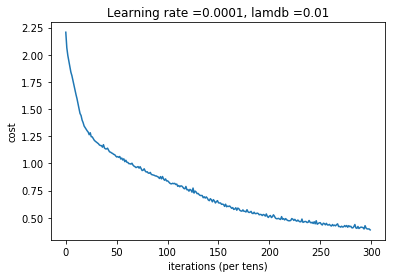

Parameters have been trained!
Train Accuracy: 0.9907407
Test Accuracy: 0.8


In [37]:
tic=time.time()
parameters = model2(X_train, Y_train, X_test, Y_test)
toc=time.time()
print ("Running time (s) : %f" % (toc-tic))

Cost after epoch 0: 1.856268
Cost after epoch 100: 1.507082
Cost after epoch 200: 1.028634
Cost after epoch 300: 0.784940
Cost after epoch 400: 0.636235
Cost after epoch 500: 0.533778
Cost after epoch 600: 0.436047
Cost after epoch 700: 0.358214
Cost after epoch 800: 0.293978
Cost after epoch 900: 0.244346
Cost after epoch 1000: 0.204953
Cost after epoch 1100: 0.170923
Cost after epoch 1200: 0.141968
Cost after epoch 1300: 0.119725
Cost after epoch 1400: 0.096104


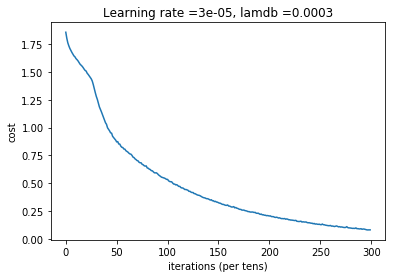

Parameters have been trained!
Train Accuracy: 0.99722224
Test Accuracy: 0.875
Running time (s) : 341.292713


In [19]:
tic=time.time()
parameters = model2(X_train, Y_train, X_test, Y_test, learning_rate = 0.00003, lamdb=0.0003)
toc=time.time()
print ("Running time (s) : %f" % (toc-tic))

Cost after epoch 0: 44769.186571
Cost after epoch 100: 41.013645
Cost after epoch 200: 31.748703
Cost after epoch 300: 12.741233
Cost after epoch 400: 11.876819
Cost after epoch 500: 12.074726
Cost after epoch 600: 12.087226
Cost after epoch 700: 12.134483
Cost after epoch 800: 12.130608
Cost after epoch 900: 12.159730
Cost after epoch 1000: 11.841404
Cost after epoch 1100: 12.245561
Cost after epoch 1200: 11.698752
Cost after epoch 1300: 12.116714
Cost after epoch 1400: 12.057697


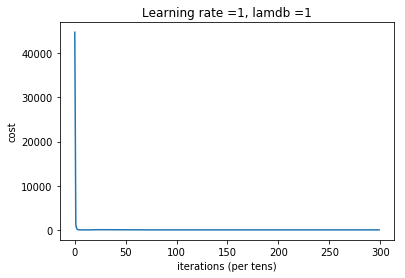

Parameters have been trained!
Train Accuracy: 0.16666667
Test Accuracy: 0.16666667
Cost after epoch 0: 187.950243
Cost after epoch 100: 2.523790
Cost after epoch 200: 2.718299
Cost after epoch 300: 2.646647
Cost after epoch 400: 2.660960
Cost after epoch 500: 2.652000
Cost after epoch 600: 2.650192
Cost after epoch 700: 2.644131
Cost after epoch 800: 2.649413
Cost after epoch 900: 2.647513
Cost after epoch 1000: 2.652607
Cost after epoch 1100: 2.643524
Cost after epoch 1200: 2.645464
Cost after epoch 1300: 2.648949
Cost after epoch 1400: 2.656090


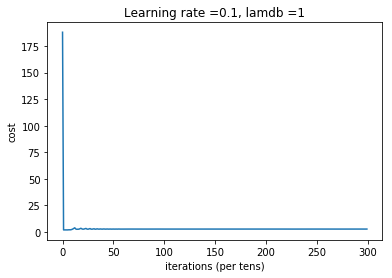

Parameters have been trained!
Train Accuracy: 0.16666667
Test Accuracy: 0.16666667
Cost after epoch 0: 13.972761
Cost after epoch 100: 1.851355
Cost after epoch 200: 1.851679
Cost after epoch 300: 1.851366
Cost after epoch 400: 1.851062
Cost after epoch 500: 1.851601
Cost after epoch 600: 1.851473
Cost after epoch 700: 1.851123
Cost after epoch 800: 1.850988
Cost after epoch 900: 1.851394
Cost after epoch 1000: 1.850468
Cost after epoch 1100: 1.851103
Cost after epoch 1200: 1.851433
Cost after epoch 1300: 1.851132
Cost after epoch 1400: 1.851579


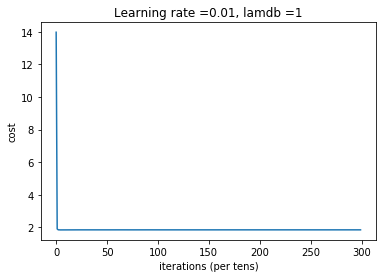

Parameters have been trained!
Train Accuracy: 0.16666667
Test Accuracy: 0.16666667
Cost after epoch 0: 17.378714
Cost after epoch 100: 1.846185
Cost after epoch 200: 1.846153
Cost after epoch 300: 1.846179
Cost after epoch 400: 1.846179
Cost after epoch 500: 1.846218
Cost after epoch 600: 1.846206
Cost after epoch 700: 1.846176
Cost after epoch 800: 1.846171
Cost after epoch 900: 1.846203
Cost after epoch 1000: 1.846119
Cost after epoch 1100: 1.846166
Cost after epoch 1200: 1.846202
Cost after epoch 1300: 1.846179
Cost after epoch 1400: 1.846227


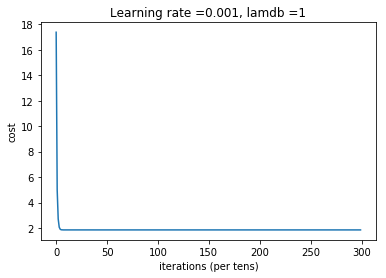

Parameters have been trained!
Train Accuracy: 0.16666667
Test Accuracy: 0.16666667
Cost after epoch 0: 34.117018
Cost after epoch 100: 2.616285
Cost after epoch 200: 1.853732
Cost after epoch 300: 1.846137
Cost after epoch 400: 1.846069
Cost after epoch 500: 1.846076
Cost after epoch 600: 1.846069
Cost after epoch 700: 1.846067
Cost after epoch 800: 1.846067
Cost after epoch 900: 1.846070
Cost after epoch 1000: 1.846062
Cost after epoch 1100: 1.846066
Cost after epoch 1200: 1.846070
Cost after epoch 1300: 1.846067
Cost after epoch 1400: 1.846072


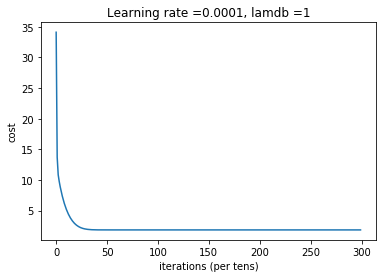

Parameters have been trained!
Train Accuracy: 0.16666667
Test Accuracy: 0.16666667
Cost after epoch 0: 18033.981217
Cost after epoch 100: 9.285796
Cost after epoch 200: 3.127566
Cost after epoch 300: 2.427477
Cost after epoch 400: 2.341848
Cost after epoch 500: 2.366888
Cost after epoch 600: 2.354425
Cost after epoch 700: 2.337551
Cost after epoch 800: 2.357778
Cost after epoch 900: 2.333937
Cost after epoch 1000: 2.317477
Cost after epoch 1100: 2.369197
Cost after epoch 1200: 2.338874
Cost after epoch 1300: 2.315915
Cost after epoch 1400: 2.323378


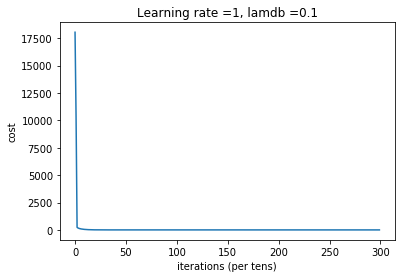

Parameters have been trained!
Train Accuracy: 0.16666667
Test Accuracy: 0.16666667
Cost after epoch 0: 92.142857
Cost after epoch 100: 1.892214
Cost after epoch 200: 1.878074
Cost after epoch 300: 1.869247
Cost after epoch 400: 1.868281
Cost after epoch 500: 1.867195
Cost after epoch 600: 1.868527
Cost after epoch 700: 1.866982
Cost after epoch 800: 1.871102
Cost after epoch 900: 1.864400
Cost after epoch 1000: 1.868552
Cost after epoch 1100: 1.870401
Cost after epoch 1200: 1.867815
Cost after epoch 1300: 1.868112
Cost after epoch 1400: 1.872239


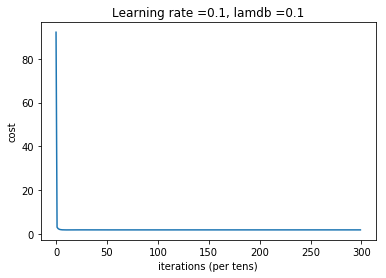

Parameters have been trained!
Train Accuracy: 0.16666667
Test Accuracy: 0.16666667
Cost after epoch 0: 11.332663
Cost after epoch 100: 1.847609
Cost after epoch 200: 1.847064
Cost after epoch 300: 1.847419
Cost after epoch 400: 1.847212
Cost after epoch 500: 1.847711
Cost after epoch 600: 1.847648
Cost after epoch 700: 1.847308
Cost after epoch 800: 1.847199
Cost after epoch 900: 1.847513
Cost after epoch 1000: 1.846689
Cost after epoch 1100: 1.847241
Cost after epoch 1200: 1.847600
Cost after epoch 1300: 1.847357
Cost after epoch 1400: 1.847761


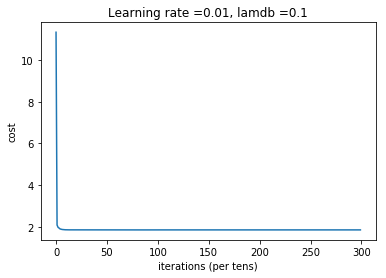

Parameters have been trained!
Train Accuracy: 0.16666667
Test Accuracy: 0.16666667
Cost after epoch 0: 4.103412
Cost after epoch 100: 1.846259
Cost after epoch 200: 1.846153
Cost after epoch 300: 1.846179
Cost after epoch 400: 1.846179
Cost after epoch 500: 1.846218
Cost after epoch 600: 1.846206
Cost after epoch 700: 1.846176
Cost after epoch 800: 1.846171
Cost after epoch 900: 1.846203
Cost after epoch 1000: 1.846119
Cost after epoch 1100: 1.846166
Cost after epoch 1200: 1.846202
Cost after epoch 1300: 1.846179
Cost after epoch 1400: 1.846227


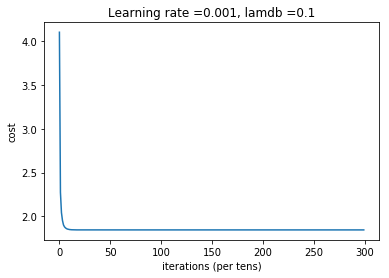

Parameters have been trained!
Train Accuracy: 0.16666667
Test Accuracy: 0.16666667
Cost after epoch 0: 5.258246
Cost after epoch 100: 1.589872
Cost after epoch 200: 1.457183
Cost after epoch 300: 1.406864
Cost after epoch 400: 1.366702
Cost after epoch 500: 1.347315
Cost after epoch 600: 1.354865
Cost after epoch 700: 1.326144
Cost after epoch 800: 1.315168
Cost after epoch 900: 1.305169
Cost after epoch 1000: 1.301716
Cost after epoch 1100: 1.322166
Cost after epoch 1200: 1.319364
Cost after epoch 1300: 1.296179
Cost after epoch 1400: 1.300364


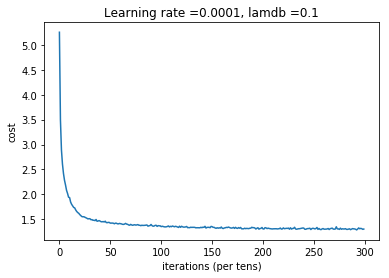

Parameters have been trained!
Train Accuracy: 0.8666667
Test Accuracy: 0.78333336
Cost after epoch 0: 14209.969050
Cost after epoch 100: 106.417408
Cost after epoch 200: 2.314594
Cost after epoch 300: 1.917269
Cost after epoch 400: 1.895980
Cost after epoch 500: 1.923115
Cost after epoch 600: 1.924963
Cost after epoch 700: 1.901522
Cost after epoch 800: 1.913525
Cost after epoch 900: 1.909653
Cost after epoch 1000: 1.896264
Cost after epoch 1100: 1.946337
Cost after epoch 1200: 1.914591
Cost after epoch 1300: 1.908917
Cost after epoch 1400: 1.897034


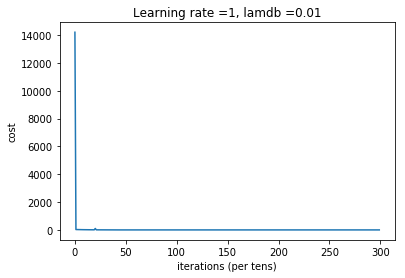

Parameters have been trained!
Train Accuracy: 0.16666667
Test Accuracy: 0.16666667
Cost after epoch 0: 71.278857
Cost after epoch 100: 1.877029
Cost after epoch 200: 1.863057
Cost after epoch 300: 1.857174
Cost after epoch 400: 1.856524
Cost after epoch 500: 1.855271
Cost after epoch 600: 1.857042
Cost after epoch 700: 1.855207
Cost after epoch 800: 1.859170
Cost after epoch 900: 1.852361
Cost after epoch 1000: 1.856694
Cost after epoch 1100: 1.858332
Cost after epoch 1200: 1.856227
Cost after epoch 1300: 1.856343
Cost after epoch 1400: 1.860291


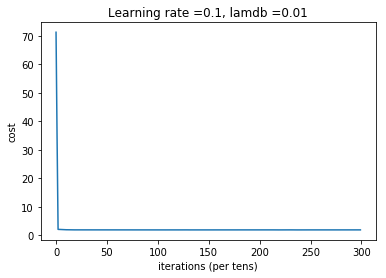

Parameters have been trained!
Train Accuracy: 0.16666667
Test Accuracy: 0.16666667
Cost after epoch 0: 5.171927
Cost after epoch 100: 1.849238
Cost after epoch 200: 1.847086
Cost after epoch 300: 1.847402
Cost after epoch 400: 1.847197
Cost after epoch 500: 1.847695
Cost after epoch 600: 1.847630
Cost after epoch 700: 1.847293
Cost after epoch 800: 1.847182
Cost after epoch 900: 1.847496
Cost after epoch 1000: 1.846673
Cost after epoch 1100: 1.847224
Cost after epoch 1200: 1.847582
Cost after epoch 1300: 1.847340
Cost after epoch 1400: 1.847743


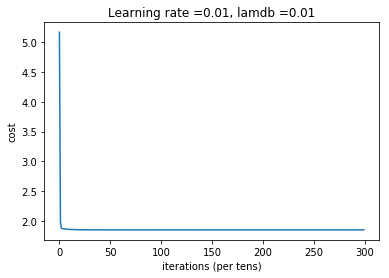

Parameters have been trained!
Train Accuracy: 0.16666667
Test Accuracy: 0.16666667
Cost after epoch 0: 2.251027
Cost after epoch 100: 0.939998
Cost after epoch 200: 0.780045
Cost after epoch 300: 0.755642
Cost after epoch 400: 0.599526
Cost after epoch 500: 0.521539
Cost after epoch 600: 0.623747
Cost after epoch 700: 0.488838
Cost after epoch 800: 0.441749
Cost after epoch 900: 0.432469
Cost after epoch 1000: 1.463750
Cost after epoch 1100: 1.225500
Cost after epoch 1200: 1.104342
Cost after epoch 1300: 1.043555
Cost after epoch 1400: 1.033514


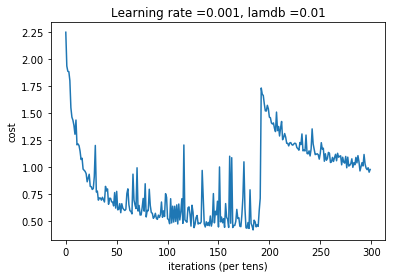

Parameters have been trained!
Train Accuracy: 0.6898148
Test Accuracy: 0.48333332
Cost after epoch 0: 2.206428
Cost after epoch 100: 1.314006
Cost after epoch 200: 1.133288
Cost after epoch 300: 1.010796
Cost after epoch 400: 0.923553
Cost after epoch 500: 0.840417
Cost after epoch 600: 0.759576
Cost after epoch 700: 0.664488
Cost after epoch 800: 0.604307
Cost after epoch 900: 0.549083
Cost after epoch 1000: 0.516351
Cost after epoch 1100: 0.473082
Cost after epoch 1200: 0.459355
Cost after epoch 1300: 0.429141
Cost after epoch 1400: 0.422414


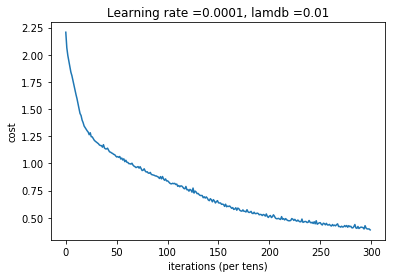

Parameters have been trained!
Train Accuracy: 0.9907407
Test Accuracy: 0.8
Cost after epoch 0: 8775.774655
Cost after epoch 100: 3.668472
Cost after epoch 200: 2.777647
Cost after epoch 300: 2.072212
Cost after epoch 400: 1.900500
Cost after epoch 500: 1.921413
Cost after epoch 600: 1.923241
Cost after epoch 700: 1.900347
Cost after epoch 800: 1.911361
Cost after epoch 900: 1.907885
Cost after epoch 1000: 1.894893
Cost after epoch 1100: 1.944275
Cost after epoch 1200: 1.912196
Cost after epoch 1300: 1.907458
Cost after epoch 1400: 1.895084


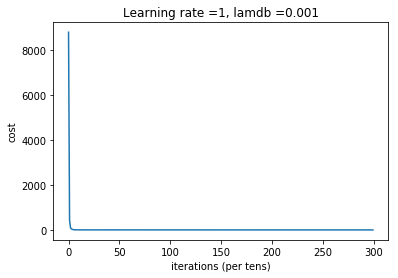

Parameters have been trained!
Train Accuracy: 0.16666667
Test Accuracy: 0.16666667
Cost after epoch 0: 35.867745
Cost after epoch 100: 1.880482
Cost after epoch 200: 1.865716
Cost after epoch 300: 1.857190
Cost after epoch 400: 1.856487
Cost after epoch 500: 1.855231
Cost after epoch 600: 1.856992
Cost after epoch 700: 1.855160
Cost after epoch 800: 1.859121
Cost after epoch 900: 1.852317
Cost after epoch 1000: 1.856652
Cost after epoch 1100: 1.858281
Cost after epoch 1200: 1.856180
Cost after epoch 1300: 1.856295
Cost after epoch 1400: 1.860242


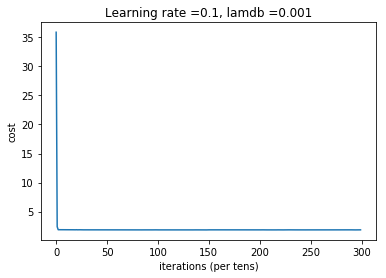

Parameters have been trained!
Train Accuracy: 0.16666667
Test Accuracy: 0.16666667
Cost after epoch 0: 3.379824
Cost after epoch 100: 1.848854
Cost after epoch 200: 1.847321
Cost after epoch 300: 1.847414
Cost after epoch 400: 1.847197
Cost after epoch 500: 1.847694
Cost after epoch 600: 1.847629
Cost after epoch 700: 1.847292
Cost after epoch 800: 1.847181
Cost after epoch 900: 1.847496
Cost after epoch 1000: 1.846672
Cost after epoch 1100: 1.847223
Cost after epoch 1200: 1.847582
Cost after epoch 1300: 1.847339
Cost after epoch 1400: 1.847743


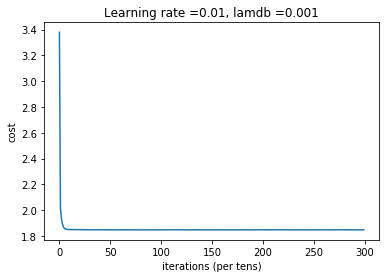

Parameters have been trained!
Train Accuracy: 0.16666667
Test Accuracy: 0.16666667
Cost after epoch 0: 1.982812
Cost after epoch 100: 1.293328
Cost after epoch 200: 0.842300
Cost after epoch 300: 0.743164
Cost after epoch 400: 0.500381
Cost after epoch 500: 0.487839
Cost after epoch 600: 0.437682
Cost after epoch 700: 0.294859
Cost after epoch 800: 0.228754
Cost after epoch 900: 0.245675
Cost after epoch 1000: 1.943252
Cost after epoch 1100: 1.907062
Cost after epoch 1200: 1.855525
Cost after epoch 1300: 1.849857
Cost after epoch 1400: 1.847775


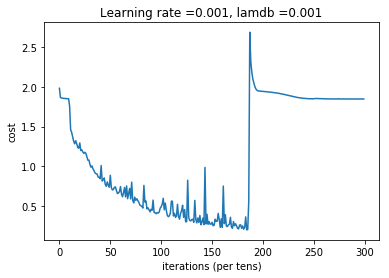

Parameters have been trained!
Train Accuracy: 0.16666667
Test Accuracy: 0.16666667
Cost after epoch 0: 1.889626
Cost after epoch 100: 1.095505
Cost after epoch 200: 0.768169
Cost after epoch 300: 0.613304
Cost after epoch 400: 0.490810
Cost after epoch 500: 0.397263
Cost after epoch 600: 0.328127
Cost after epoch 700: 0.271483
Cost after epoch 800: 0.222165
Cost after epoch 900: 0.180153
Cost after epoch 1000: 0.152162
Cost after epoch 1100: 0.134957
Cost after epoch 1200: 0.122758
Cost after epoch 1300: 0.108334
Cost after epoch 1400: 0.093378


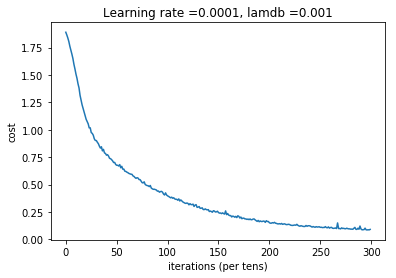

Parameters have been trained!
Train Accuracy: 1.0
Test Accuracy: 0.78333336
Cost after epoch 0: 5420.363244
Cost after epoch 100: 2.147117
Cost after epoch 200: 2.058842
Cost after epoch 300: 2.007527
Cost after epoch 400: 1.918558
Cost after epoch 500: 1.921724
Cost after epoch 600: 1.922602
Cost after epoch 700: 1.899695
Cost after epoch 800: 1.910880
Cost after epoch 900: 1.907270
Cost after epoch 1000: 1.894413
Cost after epoch 1100: 1.943768
Cost after epoch 1200: 1.911648
Cost after epoch 1300: 1.906920
Cost after epoch 1400: 1.894478


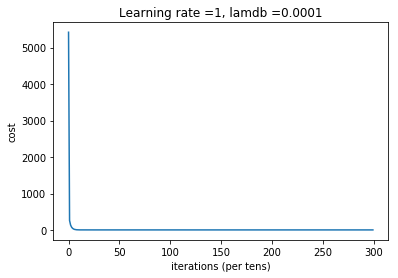

Parameters have been trained!
Train Accuracy: 0.16666667
Test Accuracy: 0.16666667
Cost after epoch 0: 23.453713
Cost after epoch 100: 1.867685
Cost after epoch 200: 1.863645
Cost after epoch 300: 1.857376
Cost after epoch 400: 1.856506
Cost after epoch 500: 1.855230
Cost after epoch 600: 1.856992
Cost after epoch 700: 1.855159
Cost after epoch 800: 1.859121
Cost after epoch 900: 1.852316
Cost after epoch 1000: 1.856652
Cost after epoch 1100: 1.858281
Cost after epoch 1200: 1.856180
Cost after epoch 1300: 1.856295
Cost after epoch 1400: 1.860241


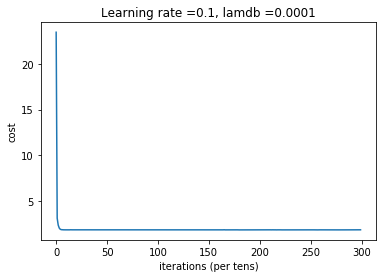

Parameters have been trained!
Train Accuracy: 0.16666667
Test Accuracy: 0.16666667
Cost after epoch 0: 3.046365
Cost after epoch 100: 2.115101
Cost after epoch 200: 1.847282
Cost after epoch 300: 1.847498
Cost after epoch 400: 1.847214
Cost after epoch 500: 1.847697
Cost after epoch 600: 1.847630
Cost after epoch 700: 1.847292
Cost after epoch 800: 1.847181
Cost after epoch 900: 1.847496
Cost after epoch 1000: 1.846672
Cost after epoch 1100: 1.847223
Cost after epoch 1200: 1.847582
Cost after epoch 1300: 1.847339
Cost after epoch 1400: 1.847743


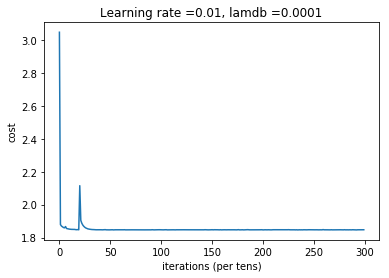

Parameters have been trained!
Train Accuracy: 0.16666667
Test Accuracy: 0.16666667
Cost after epoch 0: 1.961102
Cost after epoch 100: 0.845193
Cost after epoch 200: 0.541084
Cost after epoch 300: 0.324374
Cost after epoch 400: 0.198470
Cost after epoch 500: 0.124317
Cost after epoch 600: 0.096008
Cost after epoch 700: 0.073813
Cost after epoch 800: 0.083055
Cost after epoch 900: 0.056441
Cost after epoch 1000: 0.057294
Cost after epoch 1100: 1.432922
Cost after epoch 1200: 1.187389
Cost after epoch 1300: 1.013781
Cost after epoch 1400: 0.979444


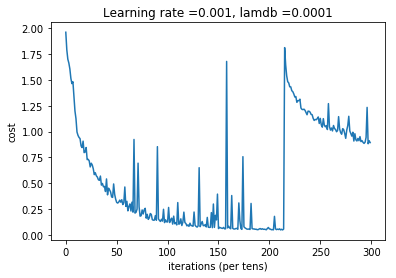

Parameters have been trained!
Train Accuracy: 0.55833334
Test Accuracy: 0.4
Cost after epoch 0: 1.859091
Cost after epoch 100: 1.420356
Cost after epoch 200: 1.001742
Cost after epoch 300: 0.569755
Cost after epoch 400: 0.352432
Cost after epoch 500: 0.241277
Cost after epoch 600: 0.156096
Cost after epoch 700: 0.108870
Cost after epoch 800: 0.064670
Cost after epoch 900: 0.041045
Cost after epoch 1000: 0.026627
Cost after epoch 1100: 0.019806
Cost after epoch 1200: 0.015868
Cost after epoch 1300: 0.012735
Cost after epoch 1400: 0.010983


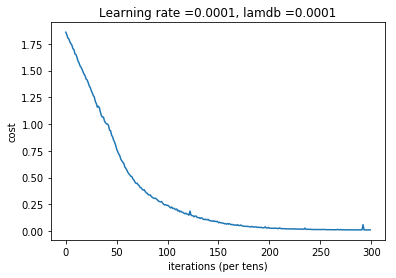

Parameters have been trained!
Train Accuracy: 1.0
Test Accuracy: 0.84166664


In [38]:
for lamdb in [1, 0.1, 0.01, 0.001, 0.0001]:
    for learning_rate in [1, 0.1, 0.01, 0.001, 0.0001]:
         model2(X_train, Y_train, X_test, Y_test, num_epochs = 1500, learning_rate = learning_rate, lamdb=lamdb)

Cost after epoch 0: 1.850334
Cost after epoch 100: 1.411641
Cost after epoch 200: 1.238641
Cost after epoch 300: 1.087653
Cost after epoch 400: 0.967113
Cost after epoch 500: 0.873996
Cost after epoch 600: 0.795302
Cost after epoch 700: 0.726222
Cost after epoch 800: 0.658599
Cost after epoch 900: 0.602163
Cost after epoch 1000: 0.551084
Cost after epoch 1100: 0.499541
Cost after epoch 1200: 0.456413
Cost after epoch 1300: 0.414161
Cost after epoch 1400: 0.375941


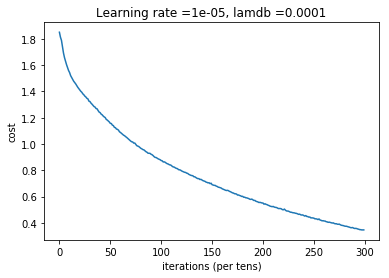

Parameters have been trained!
Train Accuracy: 0.9398148
Test Accuracy: 0.825
Cost after epoch 0: 1.857719
Cost after epoch 100: 1.406604
Cost after epoch 200: 1.228825
Cost after epoch 300: 1.071907
Cost after epoch 400: 0.948183
Cost after epoch 500: 0.850992
Cost after epoch 600: 0.769425
Cost after epoch 700: 0.698220
Cost after epoch 800: 0.633316
Cost after epoch 900: 0.575163
Cost after epoch 1000: 0.523060
Cost after epoch 1100: 0.471413
Cost after epoch 1200: 0.427251
Cost after epoch 1300: 0.385445
Cost after epoch 1400: 0.348499


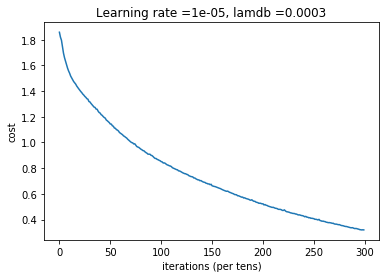

Parameters have been trained!
Train Accuracy: 0.95092595
Test Accuracy: 0.8333333
Cost after epoch 0: 1.883584
Cost after epoch 100: 1.421593
Cost after epoch 200: 1.238973
Cost after epoch 300: 1.078747
Cost after epoch 400: 0.952500
Cost after epoch 500: 0.855419
Cost after epoch 600: 0.773894
Cost after epoch 700: 0.704231
Cost after epoch 800: 0.642361
Cost after epoch 900: 0.588920
Cost after epoch 1000: 0.543123
Cost after epoch 1100: 0.493630
Cost after epoch 1200: 0.453920
Cost after epoch 1300: 0.413771
Cost after epoch 1400: 0.378378


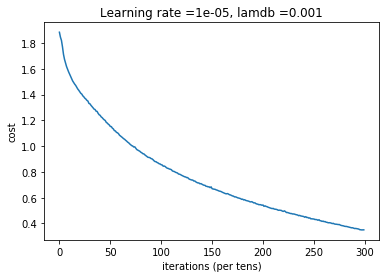

Parameters have been trained!
Train Accuracy: 0.9527778
Test Accuracy: 0.8333333
Cost after epoch 0: 1.848956
Cost after epoch 100: 1.502172
Cost after epoch 200: 1.028343
Cost after epoch 300: 0.780687
Cost after epoch 400: 0.640957
Cost after epoch 500: 0.540921
Cost after epoch 600: 0.443764
Cost after epoch 700: 0.364654
Cost after epoch 800: 0.300336
Cost after epoch 900: 0.248003
Cost after epoch 1000: 0.207512
Cost after epoch 1100: 0.171674
Cost after epoch 1200: 0.141917
Cost after epoch 1300: 0.118973
Cost after epoch 1400: 0.093268


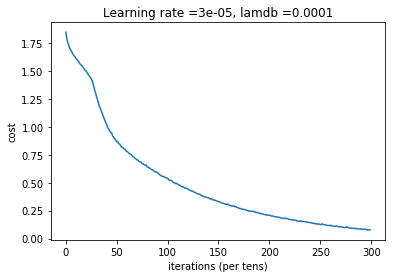

Parameters have been trained!
Train Accuracy: 0.9962963
Test Accuracy: 0.85833335
Cost after epoch 0: 1.856268
Cost after epoch 100: 1.507082
Cost after epoch 200: 1.028634
Cost after epoch 300: 0.784940
Cost after epoch 400: 0.636235
Cost after epoch 500: 0.533778
Cost after epoch 600: 0.436047
Cost after epoch 700: 0.358214
Cost after epoch 800: 0.293978
Cost after epoch 900: 0.244346
Cost after epoch 1000: 0.204953
Cost after epoch 1100: 0.170923
Cost after epoch 1200: 0.141968
Cost after epoch 1300: 0.119725
Cost after epoch 1400: 0.096104


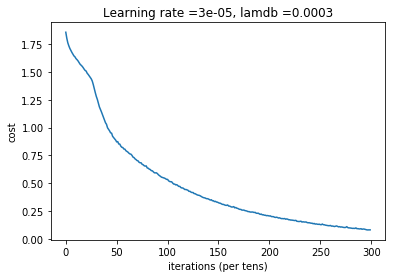

Parameters have been trained!
Train Accuracy: 0.99722224
Test Accuracy: 0.875
Cost after epoch 0: 1.881679
Cost after epoch 100: 1.535996
Cost after epoch 200: 1.064837
Cost after epoch 300: 0.847910
Cost after epoch 400: 0.716435
Cost after epoch 500: 0.625735
Cost after epoch 600: 0.538053
Cost after epoch 700: 0.462833
Cost after epoch 800: 0.404696
Cost after epoch 900: 0.355643
Cost after epoch 1000: 0.313743
Cost after epoch 1100: 0.278989
Cost after epoch 1200: 0.250185
Cost after epoch 1300: 0.222241
Cost after epoch 1400: 0.195444


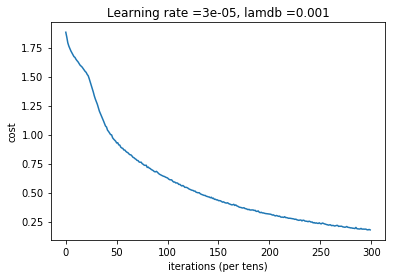

Parameters have been trained!
Train Accuracy: 0.9814815
Test Accuracy: 0.84166664
Cost after epoch 0: 1.859091
Cost after epoch 100: 1.420356
Cost after epoch 200: 1.001102
Cost after epoch 300: 0.568077
Cost after epoch 400: 0.352194
Cost after epoch 500: 0.241010
Cost after epoch 600: 0.155699
Cost after epoch 700: 0.108749
Cost after epoch 800: 0.064687
Cost after epoch 900: 0.040750
Cost after epoch 1000: 0.026750
Cost after epoch 1100: 0.020465
Cost after epoch 1200: 0.016482
Cost after epoch 1300: 0.013235
Cost after epoch 1400: 0.011261


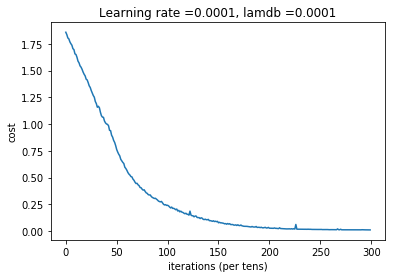

Parameters have been trained!
Train Accuracy: 1.0
Test Accuracy: 0.85833335
Cost after epoch 0: 1.864776
Cost after epoch 100: 1.035524
Cost after epoch 200: 0.739088
Cost after epoch 300: 0.579089
Cost after epoch 400: 0.472569
Cost after epoch 500: 0.380823
Cost after epoch 600: 0.321411
Cost after epoch 700: 0.257164
Cost after epoch 800: 0.209622
Cost after epoch 900: 0.174652
Cost after epoch 1000: 0.150455
Cost after epoch 1100: 0.120423
Cost after epoch 1200: 0.112488
Cost after epoch 1300: 0.078570
Cost after epoch 1400: 0.072530


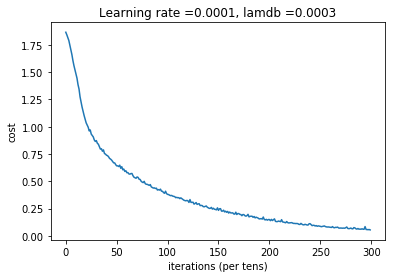

Parameters have been trained!
Train Accuracy: 0.9990741
Test Accuracy: 0.7416667
Cost after epoch 0: 1.889627
Cost after epoch 100: 1.095505
Cost after epoch 200: 0.768182
Cost after epoch 300: 0.613252
Cost after epoch 400: 0.490760
Cost after epoch 500: 0.397221
Cost after epoch 600: 0.328266
Cost after epoch 700: 0.271536
Cost after epoch 800: 0.222281
Cost after epoch 900: 0.180209
Cost after epoch 1000: 0.152214
Cost after epoch 1100: 0.135251
Cost after epoch 1200: 0.122743
Cost after epoch 1300: 0.108314
Cost after epoch 1400: 0.093410


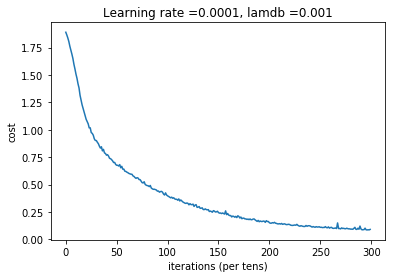

Parameters have been trained!
Train Accuracy: 1.0
Test Accuracy: 0.78333336


In [16]:
for learning_rate in [0.00001, 0.00003, 0.0001]:
    for lamdb in [0.0001, 0.0003, 0.001]:
         model2(X_train, Y_train, X_test, Y_test, num_epochs = 1500, learning_rate = learning_rate, lamdb=lamdb)

## GPU Version

In [15]:
# GRADED FUNCTION: create_placeholders

def create_placeholders_gpu(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    ### START CODE HERE ### (approx. 2 lines)
    with tf.device('/gpu:0'):
        X = tf.placeholder(tf.float32, (n_x, None))
        Y = tf.placeholder(tf.float32, (n_y, None))
    ### END CODE HERE ###
    
    return X, Y

In [16]:
# GRADED FUNCTION: create_placeholders

def create_placeholders_cpu(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    ### START CODE HERE ### (approx. 2 lines)
    with tf.device('/cpu:0'):
        X = tf.placeholder(tf.float32, (n_x, None))
        Y = tf.placeholder(tf.float32, (n_y, None))
    ### END CODE HERE ###
    
    return X, Y

In [17]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters_gpu():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 6 lines of code)
    with tf.device('/gpu:0'):
        W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
        b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
        W2 = tf.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
        b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
        W3 = tf.get_variable("W3", [6,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
        b3 = tf.get_variable("b3", [6,1], initializer = tf.zeros_initializer())
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [25]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters_cpu():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 6 lines of code)
    with tf.device('/cpu:0'):
        W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
        b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
        W2 = tf.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
        b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
        W3 = tf.get_variable("W3", [6,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
        b3 = tf.get_variable("b3", [6,1], initializer = tf.zeros_initializer())
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [18]:
# GRADED FUNCTION: forward_propagation

def forward_propagation_gpu(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    ### START CODE HERE ### (approx. 5 lines)              # Numpy Equivalents:
    with tf.device('/gpu:0'):
        Z1 = tf.matmul(W1, X) + b1                             # Z1 = np.dot(W1, X) + b1
        A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
        Z2 = tf.matmul(W2, A1) + b2                            # Z2 = np.dot(W2, a1) + b2
        A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
        Z3 = tf.matmul(W3, A2) + b3                             # Z3 = np.dot(W3,Z2) + b3
    ### END CODE HERE ###
    
    return Z3

In [19]:
# GRADED FUNCTION: forward_propagation

def forward_propagation_cpu(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    ### START CODE HERE ### (approx. 5 lines)              # Numpy Equivalents:
    with tf.device('/cpu:0'):
        Z1 = tf.matmul(W1, X) + b1                             # Z1 = np.dot(W1, X) + b1
        A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
        Z2 = tf.matmul(W2, A1) + b2                            # Z2 = np.dot(W2, a1) + b2
        A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
        Z3 = tf.matmul(W3, A2) + b3                             # Z3 = np.dot(W3,Z2) + b3
    ### END CODE HERE ###
    
    return Z3

In [20]:
# GRADED FUNCTION: compute_cost 

def compute_cost_gpu(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    ### START CODE HERE ### (1 line of code)
    with tf.device('/gpu:0'):
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    ### END CODE HERE ###
    
    return cost

In [21]:
# GRADED FUNCTION: compute_cost 

def compute_cost_cpu(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    ### START CODE HERE ### (1 line of code)
    with tf.device('/cpu:0'):
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    ### END CODE HERE ###
    
    return cost

In [22]:
def model2_gpu(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True, lamdb = 0.01, gpu_on=True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = gpu_on
    
    # Create Placeholders of shape (n_x, n_y)
    ### START CODE HERE ### (1 line)
#    with tf.device('/gpu:0'):
    X, Y = create_placeholders_gpu(n_x, n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters2 = initialize_parameters_gpu()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z3 = forward_propagation_gpu(X, parameters2)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost_gpu(Z3, Y)
    
    W1 = parameters2['W1']
    W2 = parameters2['W2']
    W3 = parameters2['W3']
    with tf.device('/gpu:0'):
        regularizer = tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2) + tf.nn.l2_loss(W3)
        cost = tf.reduce_mean(cost + lamdb*regularizer)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    ### START CODE HERE ### (1 line)
    with tf.device('/gpu:0'):
        optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session(config=config) as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            with tf.device('/gpu:0'):
                minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                ### END CODE HERE ###
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate) + ", " + "lamdb =" + str(lamdb))
        plt.show()

        # lets save the parameters in a variable
        parameters2 = sess.run(parameters2)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters2

In [27]:
def model2_cpu(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True, lamdb = 0.01, gpu_on=True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    
    # Create Placeholders of shape (n_x, n_y)
    ### START CODE HERE ### (1 line)
#    with tf.device('/gpu:0'):
    X, Y = create_placeholders_cpu(n_x, n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters2 = initialize_parameters_cpu()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z3 = forward_propagation_cpu(X, parameters2)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost_cpu(Z3, Y)
    
    W1 = parameters2['W1']
    W2 = parameters2['W2']
    W3 = parameters2['W3']
    with tf.device('/cpu:0'):
        regularizer = tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2) + tf.nn.l2_loss(W3)
        cost = tf.reduce_mean(cost + lamdb*regularizer)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    ### START CODE HERE ### (1 line)
    with tf.device('/cpu:0'):
        optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            with tf.device('/cpu:0'):
                minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                ### END CODE HERE ###
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate) + ", " + "lamdb =" + str(lamdb))
        plt.show()

        # lets save the parameters in a variable
        parameters2 = sess.run(parameters2)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters2

Cost after epoch 0: 1.856268
Cost after epoch 100: 1.507082
Cost after epoch 200: 1.028634
Cost after epoch 300: 0.784940
Cost after epoch 400: 0.636235
Cost after epoch 500: 0.533778
Cost after epoch 600: 0.436047
Cost after epoch 700: 0.358214
Cost after epoch 800: 0.293978
Cost after epoch 900: 0.244346
Cost after epoch 1000: 0.204953
Cost after epoch 1100: 0.170923
Cost after epoch 1200: 0.141968
Cost after epoch 1300: 0.119725
Cost after epoch 1400: 0.096104


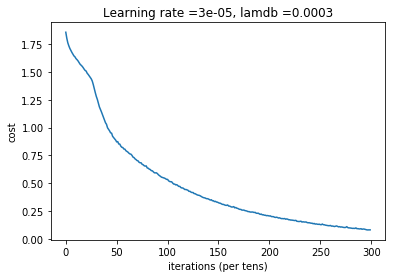

Parameters have been trained!
Train Accuracy: 0.99722224
Test Accuracy: 0.875
GPU Running time (s) : 353.532749
Cost after epoch 0: 1.856268
Cost after epoch 100: 1.507082
Cost after epoch 200: 1.028634
Cost after epoch 300: 0.784940
Cost after epoch 400: 0.636235
Cost after epoch 500: 0.533778
Cost after epoch 600: 0.436047
Cost after epoch 700: 0.358214
Cost after epoch 800: 0.293978
Cost after epoch 900: 0.244346
Cost after epoch 1000: 0.204953
Cost after epoch 1100: 0.170923
Cost after epoch 1200: 0.141968
Cost after epoch 1300: 0.119725
Cost after epoch 1400: 0.096104


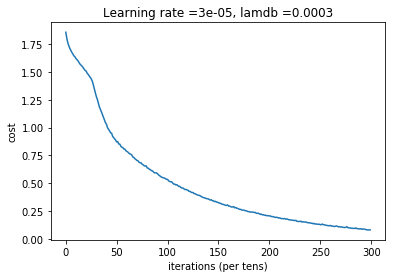

Parameters have been trained!
Train Accuracy: 0.99722224
Test Accuracy: 0.875
CPU Running time (s) : 427.907475


In [29]:
import time

tic=time.time()
model2_gpu(X_train, Y_train, X_test, Y_test, num_epochs = 1500, learning_rate = 0.00003, lamdb=0.0003, print_cost = True, gpu_on=True)
toc=time.time()
print ("GPU Running time (s) : %f" % (toc-tic))

tic=time.time()
model2_cpu(X_train, Y_train, X_test, Y_test, num_epochs = 1500, learning_rate = 0.00003, lamdb=0.0003, print_cost = True)
toc=time.time()
print ("CPU Running time (s) : %f" % (toc-tic))

Cost after epoch 0: 1.855702
Cost after epoch 100: 1.016458
Cost after epoch 200: 0.733102
Cost after epoch 300: 0.572939
Cost after epoch 400: 0.468774
Cost after epoch 500: 0.381015
Cost after epoch 600: 0.313829
Cost after epoch 700: 0.254169
Cost after epoch 800: 0.203800
Cost after epoch 900: 0.166474
Cost after epoch 1000: 0.141408
Cost after epoch 1100: 0.107606
Cost after epoch 1200: 0.086730
Cost after epoch 1300: 0.061016
Cost after epoch 1400: 0.050911


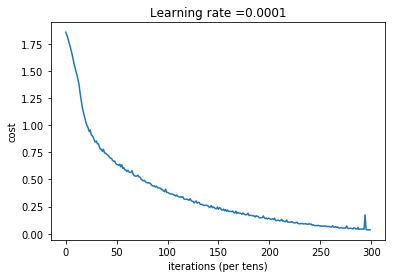

Parameters have been trained!
Train Accuracy: 0.9990741
Test Accuracy: 0.725
Running time (s) : 350.191854


In [30]:
tic=time.time()
parameters = model(X_train, Y_train, X_test, Y_test)
toc=time.time()
print ("Running time (s) : %f" % (toc-tic))